# Linear Regression: All variables (sklearn)

Contents
 - load data
 - multiple regression (with sklearn)
   - choose independent variables
   - fit model
   - prepare model matrix and scale X
   - predictions
   - performance
   - coefficients

Sources:
http://ww2.amstat.org/publications/jse/v19n3/decock.pdf

Copyright (C) 2018 Alan Chalk  
Please do not distribute or publish without permission.

## Start_.

**Packages needed**

In [2]:
import os
import numpy as np
import pandas as pd
import pickle

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

**Functions**

In [3]:
def fn_MAE(actuals, predictions):
    return np.round(np.mean(np.abs(predictions - actuals)))

**Directories and paths**

In [4]:
# Set directories
print(os.getcwd())
dirRawData = "../input/"
dirPData   = "../PData/"

/home/jovyan/Projects/AmesHousing/PCode


**Settings**

In [5]:
font = {'size'   : 22}
plt.rc('font', **font)

**Load data**

In [6]:
# load df_all
#df_all = pd.read_hdf(dirPData + '02_df_all.h5', 'df_all_onehot')

f_name = dirPData + '02_df.pickle'
with open(f_name, "rb") as f:
    dict_ = pickle.load(f)
    
df_all_onehot = dict_['df_all_onehot']

del f_name, dict_

# load the dict_ that was saved to pickle
#dict_ = {'vars_ind': vars_ind, 'idx_design': idx_design, 'idx_test': idx_test}
f_name = dirPData + '02_vars.pickle'
with open(f_name, "rb") as f:
    dict_ = pickle.load(f)
    
vars_ind_numeric = dict_['vars_ind_numeric']
var_dep = dict_['var_dep']
vars_ind_categorical = dict_['vars_ind_categorical']
vars_ind_onehot = dict_['vars_ind_onehot']

del f_name, dict_

In [7]:
idx_train  = np.where(df_all_onehot['fold'].isin(np.arange(0,6)))[0]
idx_val    = np.where(df_all_onehot['fold'].isin([6,7]))[0]
idx_design = np.where(df_all_onehot['fold'].isin(np.arange(0,8)))[0]
idx_test   = np.where(df_all_onehot['fold'].isin([8,9]))[0]

In [31]:
# df_all_onehot[vars_ind_numeric + vars_ind_onehot]

## Multiple regression with sklearn

**Choose indenpendent variables**

TODO
 - Create a list: vars_ind
 - vars_ind should contain all features from vars_ind_numeric and vars_ind_onehot
 - Note: In Python you can concatenate two lists with the + operator
 - Check - the length of vars_ind shoud be 216

In [9]:
vars_ind = vars_ind_numeric + vars_ind_onehot

In [10]:
len(vars_ind)

216

**Prepare model matrix and scale data**

TODO
 - prepare X and y the model matrix and target variable (e.g. df_all_onehot[vars_ind].values)
 - create a standard scaler and fit it over training data only
 - transform separately the train and val and test data to create X_train, X_val and X_test

In [11]:
X = df_all_onehot[vars_ind].values
y = df_all_onehot[var_dep].values

In [12]:
# df_all_onehot.iloc[idx_train]
# X[idx_train] #train data
# X.shape

In [13]:
standardScaler_ = StandardScaler()
standardScaler_.fit(X[idx_train])

X_train = standardScaler_.transform(X[idx_train])
X_val   = standardScaler_.transform(X[idx_val])
X_test  = standardScaler_.transform(X[idx_test])

**Fit model**

** TODO **

 - import LinearRegression from sklearn.linear_model
 - create an instance called lm_
 - fit the model to X=X_train, y = y[idx_train]

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm_ = LinearRegression()

In [16]:
lm_.fit(X_train, y[idx_train])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Predictions**

TODO 

 - Create lm__pred_train, lm__pred_val and lm__pred_test being predictions over train, val and test data
 - Based on train data only, calculate the mean predicted sale price and compare it to mean actual sale price

In [17]:
# X_train.shape
# X_test.shape
# np.sum(X)

In [18]:
# prediction 
lm__pred_train = lm_.predict(X_train)
lm__pred_val   = lm_.predict(X_val)
lm__pred_test  = lm_.predict(X_test)

In [19]:
mean_predicted = np.mean(lm__pred_train)
mean_actual = np.mean(y[idx_train])
print('mean predicted sale price', mean_predicted)
print('mean actual sale price', mean_actual)

mean predicted sale price 180885.7459303006
mean actual sale price 180885.95128044972


In [20]:
# Note: This code does not give correct predictions.
# I do not know why. Possibly rounding errors due to the huge coefficients - see later
print('prediction on first example', np.round(lm__pred_train[0], 0), '\n')

#print('intercept', lm_.intercept_, '\n')
#print('coefficients', lm_.coef_, '\n')

print('manual prediction', np.round(lm_.intercept_ + lm_.coef_.dot(X_train[0]), 0))

prediction on first example [175726.] 

manual prediction [175727.]


**Performance**

TODO 

 - Find performance on train, val and test
 - Comment on similarities and differences

In [21]:
# mean absolute error in predictions

train_error = fn_MAE(y[idx_train], lm__pred_train) 
validation_error = fn_MAE(y[idx_val], lm__pred_val)
test_error = fn_MAE(y[idx_test], lm__pred_test)

# on train data
print('train error', train_error)
print('\n')

# on validation data
print('validation naive (null) model', fn_MAE(np.median(y[idx_val]),  y[idx_val]))
print('validation error', validation_error)
print('\n')

# test data, null model
print('test naive (null) model', fn_MAE(np.median(y[idx_test]), y[idx_test]))
print('test error', test_error)

train error 13500.0


validation naive (null) model 55868.0
validation error 15679.0


test naive (null) model 52392.0
test error 15604.0


Text(0, 0.5, 'actual')

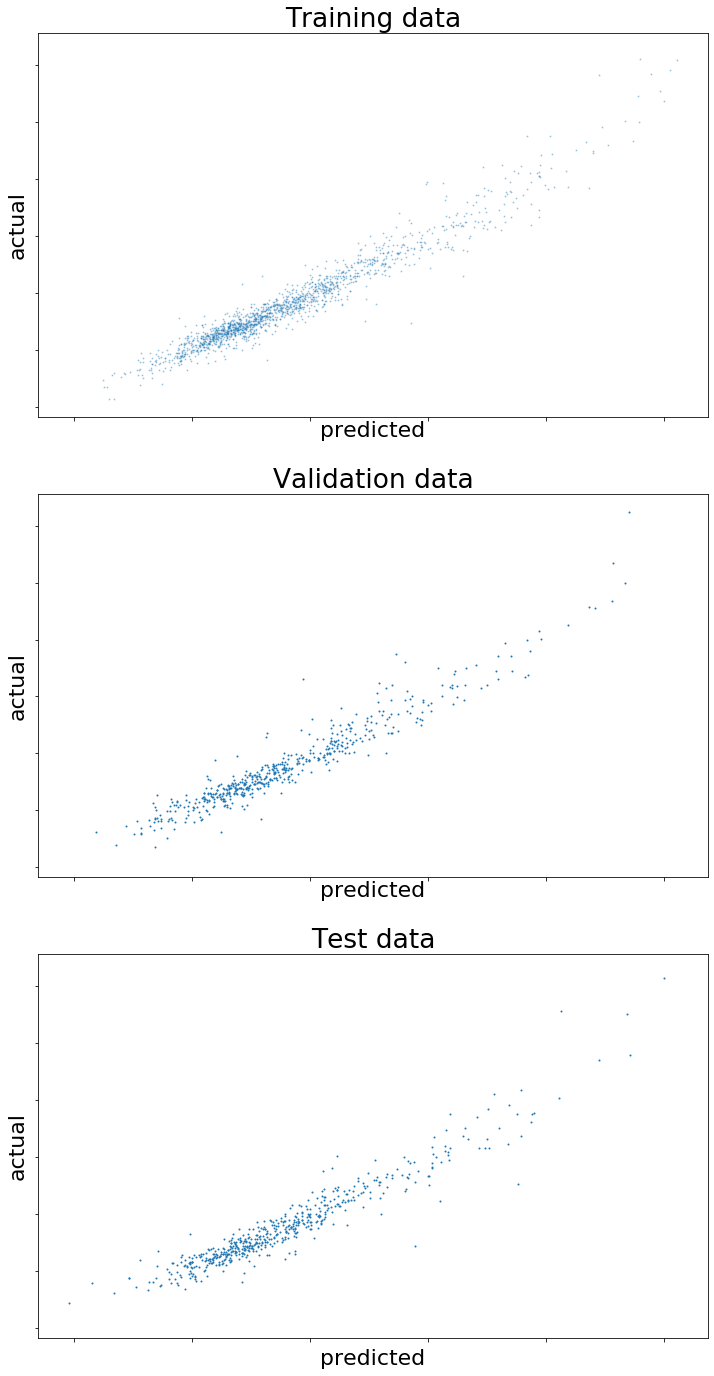

In [28]:
# fig, axes = plt.subplots(1, 2, figsize=[16,6], sharex=True, sharey=True)
# axes[0].scatter(lm__pred_train, y[idx_train], s = 1, alpha = 0.3)
# axes[0].set_title('Training data')
# axes[0].axes.xaxis.set_ticklabels([])
# axes[0].axes.yaxis.set_ticklabels([])
# axes[0].set_xlabel('predicted')
# axes[0].set_ylabel('actual')

# axes[1].scatter(lm__pred_val, y[idx_val], s = 1)
# axes[1].set_title('Validation data')
# axes[1].set_xlabel('predicted')
# axes[1].set_ylabel('actual')

###CHANGED PROF's CODE TO ALSO INCLUDE TEST DATA

fig, axes = plt.subplots(3, 1, figsize=[12,24], sharex=True, sharey=True)
axes[0].scatter(lm__pred_train, y[idx_train], s = 1, alpha = 0.3)
axes[0].set_title('Training data')
axes[0].axes.xaxis.set_ticklabels([])
axes[0].axes.yaxis.set_ticklabels([])
axes[0].set_xlabel('predicted')
axes[0].set_ylabel('actual')

axes[1].scatter(lm__pred_val, y[idx_val], s = 1)
axes[1].set_title('Validation data')
axes[1].set_xlabel('predicted')
axes[1].set_ylabel('actual')

axes[2].scatter(lm__pred_test, y[idx_test], s = 1)
axes[2].set_title('Test data')
axes[2].set_xlabel('predicted')
axes[2].set_ylabel('actual')



**Coefficients**

TODO

- Using the code below, look at the coefficients
- Can you explain the coefficients for bsmt_unf_sf and total_bsmt_sf

In [48]:
coef_skl_intercept = list(lm_.intercept_)
coef_skl_other = list(lm_.coef_.flatten())
coef_skl = coef_skl_intercept + coef_skl_other

In [49]:
pd_lm_results = pd.DataFrame({'features': ['intercept'] + vars_ind,
                              'estimateCoefficients': coef_skl})
pd_lm_results

,features,estimateCoefficients
0,intercept,1.808860e+05
1,lot_area,4.397877e+03
2,overall_qual,1.051869e+04
3,overall_cond,7.274313e+03
4,year_built,1.164076e+04
5,year_remod_add,1.277611e+03
6,bsmtfin_sf_1,-7.493200e+14
7,bsmtfin_sf_2,-2.940820e+14
8,bsmt_unf_sf,-7.439204e+14
9,total_bsmt_sf,7.129919e+14
